**LOAD DATA**

In [1]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/pelabelanmanual.csv", sep=';')
df

,content,score,review_cleaned,label
0,"suka berguna banget, program dan internalnya l...",5,suka berguna banget program internalnya fleksi...,netral
1,"Terbaru sangat praktis,program dan internalnya...",5,terbaru praktis program internalnya memadai pa...,netral
2,"Asliii sangat praktis,program dan internalnya ...",5,asli praktis program internalnya memadai pakai...,netral
3,"Asli sangat praktis,program dan internalnya le...",5,asli praktis program internalnya memadai pakai...,netral
4,"Asli sangat praktis,program dan internalnya le...",5,asli praktis program internalnya memadai pakai...,netral
...,...,...,...,...
995,"Seabank ini sangat bagus, dan tidak ada biaya ...",5,bagus biaya admin terima kasih membantu,NaN
996,sumpah seabank terbaik. bisa jadi tempat menab...,5,sumpah terbaik menabung deposito transfer baya...,NaN
997,"maaf saya kasih bintang 2,,kenapa seabank seen...",5,maaf kasih bintang blocked akun pembukaan bloc...,NaN
998,sangat simple dan membatu..sangat mudah di gun...,5,simple membatu mudah,NaN


**PREPROCESSING**

In [2]:
#cek missing value
df.isnull().sum()

,0
content,0
score,0
review_cleaned,0
label,750


In [3]:
#hapus kolom label
df = df.drop('label', axis=1)

In [4]:
#cek duplikat
df.duplicated().sum()

np.int64(1)

In [5]:
#hapus duplikat
df = df.drop_duplicates()

In [6]:
#cek ulang missing value, duplikat,
df.isnull().sum()
df.duplicated().sum()
df

,content,score,review_cleaned
0,"suka berguna banget, program dan internalnya l...",5,suka berguna banget program internalnya fleksi...
1,"Terbaru sangat praktis,program dan internalnya...",5,terbaru praktis program internalnya memadai pa...
2,"Asliii sangat praktis,program dan internalnya ...",5,asli praktis program internalnya memadai pakai...
3,"Asli sangat praktis,program dan internalnya le...",5,asli praktis program internalnya memadai pakai...
4,"Asli sangat praktis,program dan internalnya le...",5,asli praktis program internalnya memadai pakai...
...,...,...,...
995,"Seabank ini sangat bagus, dan tidak ada biaya ...",5,bagus biaya admin terima kasih membantu
996,sumpah seabank terbaik. bisa jadi tempat menab...,5,sumpah terbaik menabung deposito transfer baya...
997,"maaf saya kasih bintang 2,,kenapa seabank seen...",5,maaf kasih bintang blocked akun pembukaan bloc...
998,sangat simple dan membatu..sangat mudah di gun...,5,simple membatu mudah


**ALGORITMA K-MEANS**

In [7]:
#menghitung TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
teks = df['review_cleaned'].astype(str)

tfidf_vectorizer = TfidfVectorizer(norm='l2')
tfidf_matrix = tfidf_vectorizer.fit_transform(teks)
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_mean = df_tfidf.mean().sort_values(ascending=False)

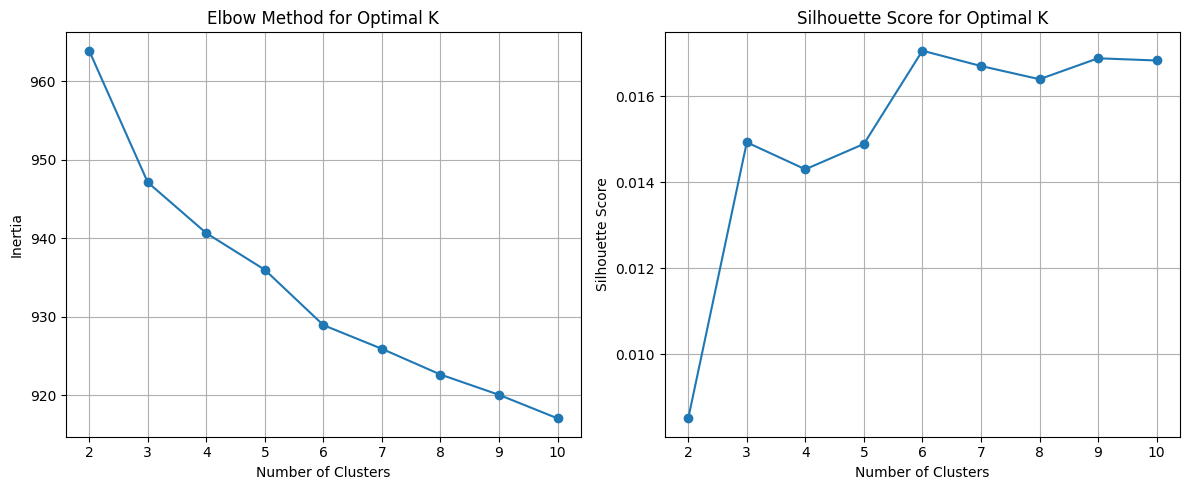

In [8]:
#clustering menggunakan algoritma k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# data untuk clustering
X = df_tfidf.copy()

inertia_values = []
silhouette_scores = []

k_range = range(2, 11)

for k in k_range:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_model.fit(X)
    inertia_values.append(kmeans_model.inertia_)
    cluster_labels = kmeans_model.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot untuk Elbow method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)

# Plot untuk Silhouette method
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)

plt.tight_layout()
plt.show()


In [9]:
#mengurangi dimensi mejadi dua
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_tfidf)

In [10]:
#algoritma kmeans
k = 3 #nilai k berdasarkan hasil elbow method
kmeans = KMeans(n_clusters=k, n_init=5, max_iter=500, random_state=42)
kmeans.fit(df_tfidf)

KMeans(max_iter=500, n_clusters=3, n_init=5, random_state=42)

In [11]:
#menyimpan di dataframe
results = pd.DataFrame()
results['teks'] = teks
results['cluster_kmeans'] = kmeans.labels_
print(results.sample(10))

                                                  teks  cluster_kmeans
476  hati pake kena tipu saldo kepotong transfer ma...               0
264  pembayaran pakai ribet sayangnya layanan pinja...               0
983  user friendly aman cepat bagus digital terima ...               1
309  kecuali fingerprint shopee error touch verify ...               0
782  senang pake saran pengisian saldonya ditambah ...               0
132  akun taidak dibuka alasan amankan telpon penye...               0
961  digital terbaik mantap fiturnya gratis bunga b...               0
687      scan kode berfungsi traksaksi tolong perbaiki               0
304  digital bagus simpel ribet pembayaran cepat se...               1
226  keren banget gratis biaya administrasi transfe...               0


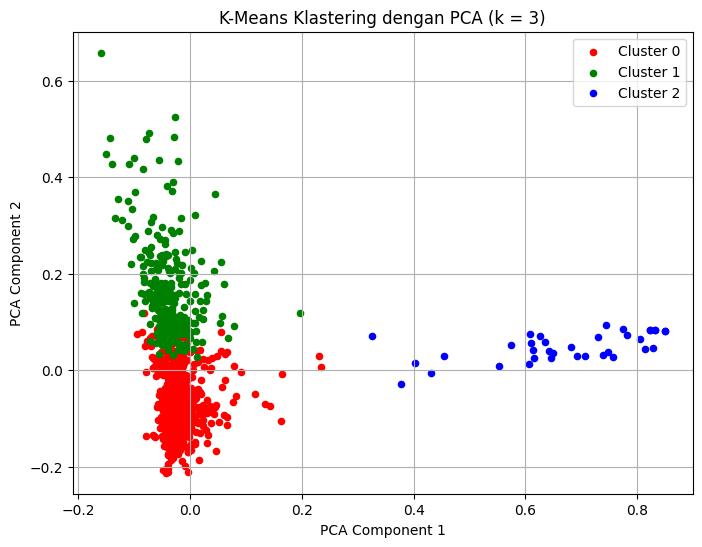

In [12]:
# visualisasi klaster
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink']
cluster_labels = [f"Cluster {i}" for i in range(k)]

plt.figure(figsize=(8, 6))

for i in range(k):
    plt.scatter(
        reduced_data[kmeans.labels_ == i, 0],
        reduced_data[kmeans.labels_ == i, 1],
        s=20,
        color=colors[i],
        label=cluster_labels[i]
    )

plt.legend()
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Klastering dengan PCA (k = 3)')
plt.grid(True)
plt.show()


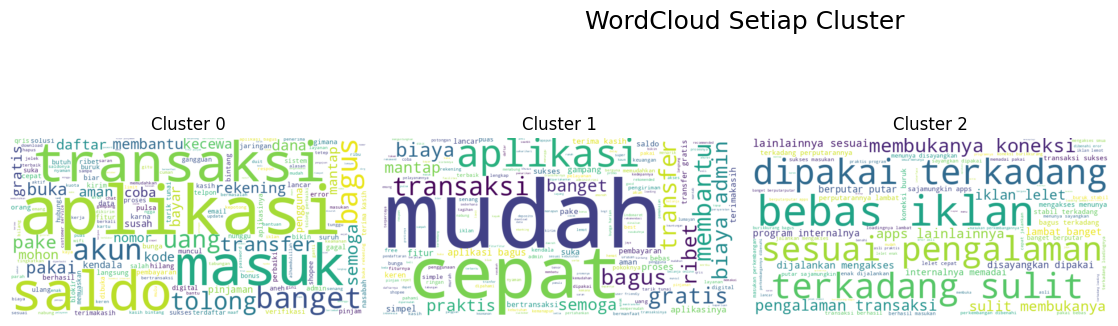

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

unique_clusters = np.unique(kmeans.labels_)
plt.figure(figsize=(15, 8))

for i, cluster_id in enumerate(unique_clusters):
    cluster_text = " ".join([teks.iloc[j] for j in range(len(teks)) if kmeans.labels_[j] == cluster_id])
    wc = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)

    # plot
    plt.subplot(2, 4, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Cluster {cluster_id}')
    plt.axis('off')

plt.suptitle("WordCloud Setiap Cluster", fontsize=18)
plt.tight_layout()
plt.show()


**ALGORITMA BERTopic**

In [14]:
!pip install bertopic
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.4 MB/s eta 0:00:00


In [15]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

docs = df['review_cleaned'].tolist()
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(embedding_model=embedding_model, verbose=True)
topics, probs = topic_model.fit_transform(docs)
df['Topic'] = topics

topic_freq = topic_model.get_topic_freq()
print("Distribusi Topic:\n", topic_freq)

for i in topic_freq['Topic'].unique():
    print(f"Topik {i}:\n", topic_model.get_topic(i), "\n")


/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2025-12-17 13:30:14,200 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2025-12-17 13:30:32,940 - BERTopic - Embedding - Completed ✓
2025-12-17 13:30:32,941 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-12-17 13:30:45,971 - BERTopic - Dimensionality - Completed ✓
2025-12-17 13:30:45,972 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-17 13:30:46,012 - BERTopic - Cluster - Completed ✓
2025-12-17 13:30:46,017 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-17 13:30:46,044 - BERTopic - Representation - Completed ✓


Distribusi Topic:
    Topic  Count
1      0    955
0      1     44
Topik 0:
 [('aplikasi', np.float64(0.08071418609754992)), ('mudah', np.float64(0.06099386743571384)), ('transaksi', np.float64(0.05500146278218987)), ('bagus', np.float64(0.05404119860884491)), ('transfer', np.float64(0.04750677168759357)), ('saldo', np.float64(0.0449437335805222)), ('masuk', np.float64(0.04467490185692065)), ('cepat', np.float64(0.0435570911960001)), ('banget', np.float64(0.04082942806795246)), ('uang', np.float64(0.040080744131223665))] 

Topik 1:
 [('terkadang', np.float64(0.20259175619569855)), ('dipakai', np.float64(0.13547501194725048)), ('apps', np.float64(0.13186114930316642)), ('sulit', np.float64(0.1271585640138069)), ('koneksi', np.float64(0.12360691044568467)), ('iklan', np.float64(0.11710128358012231)), ('pengalaman', np.float64(0.11688606063212223)), ('mengakses', np.float64(0.11592035075083057)), ('lambat', np.float64(0.11159425738950829)), ('bebas', np.float64(0.10751885862760654))] 



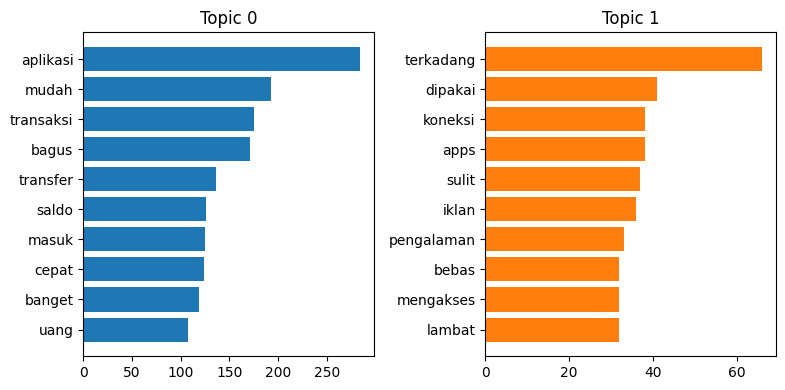

In [16]:
#visualisasi barchart untuk masing-masing topik
import matplotlib.pyplot as plt
from collections import Counter
import math

topic_ids = sorted(df['Topic'].unique())

top_n_words = 10
cols = 4
rows = math.ceil(len(topic_ids) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))
axes = axes.flatten()

for i, topic in enumerate(topic_ids):
    text = " ".join(df[df['Topic'] == topic]['review_cleaned']).split()

    counts = Counter(text).most_common(top_n_words)
    words = [w[0] for w in counts]
    vals = [w[1] for w in counts]

    axes[i].barh(words, vals, color="C"+str(i%10))
    axes[i].invert_yaxis()
    axes[i].set_title(f"Topic {topic}")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


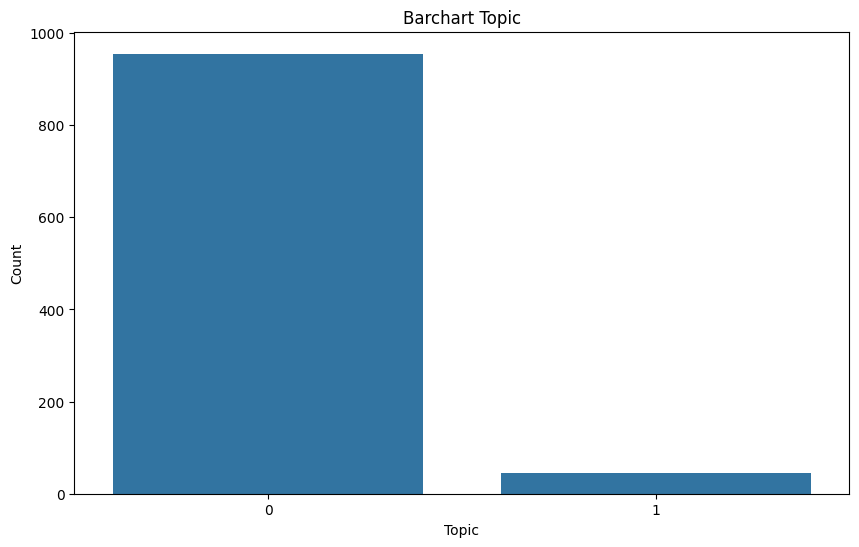

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

topic_freq = df['Topic'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=topic_freq.index, y=topic_freq.values)
plt.title("Barchart Topic")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-674094870.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(df['Topic'].unique()))


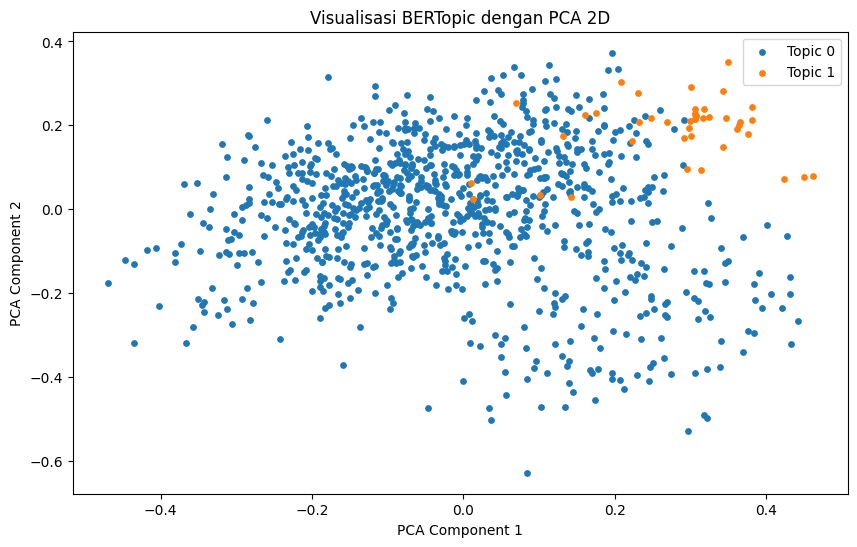

In [18]:
#visualisasi BERTopic menggunakan PCA 2D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

embeddings = topic_model.embedding_model.embed(df['review_cleaned'].tolist())

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

df['pca1'] = reduced[:,0]
df['pca2'] = reduced[:,1]

colors = plt.cm.get_cmap('tab20', len(df['Topic'].unique()))

plt.figure(figsize=(10,6))
for topic in sorted(df['Topic'].unique()):
    subset = df[df['Topic'] == topic]
    plt.scatter(subset['pca1'], subset['pca2'],
                label=f"Topic {topic}", s=15)

plt.title("Visualisasi BERTopic dengan PCA 2D")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


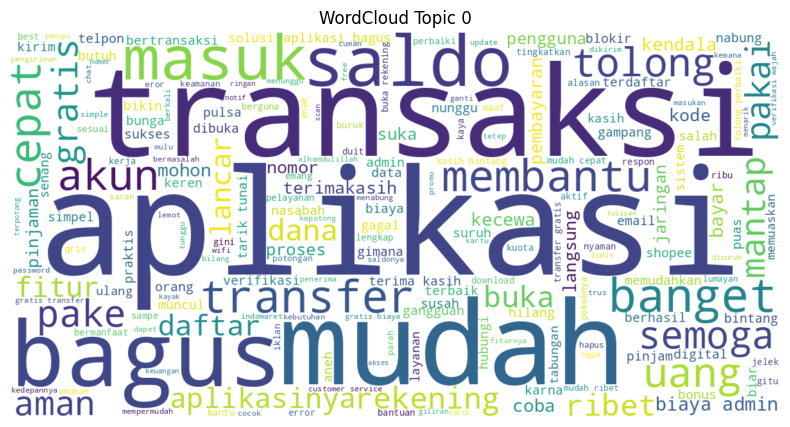

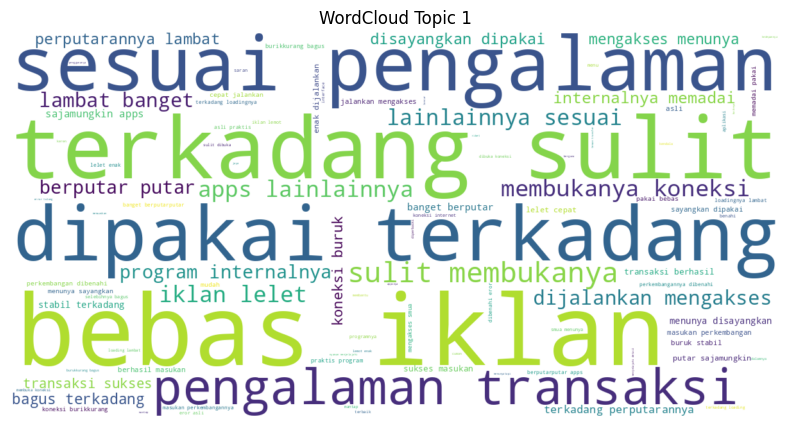

In [19]:
#wordcloud untuk masing-masing topik
from wordcloud import WordCloud
import matplotlib.pyplot as plt

topic_list = sorted(df['Topic'].unique())

for topic_id in topic_list:
    text = " ".join(df[df['Topic'] == topic_id]['review_cleaned'])
    if len(text.strip()) == 0:
        print(f"Topic {topic_id} kosong, dilewati.")
        continue

    wordcloud = WordCloud(
        width=1200,
        height=600,
        background_color='white'
    ).generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Topic {topic_id}")
    plt.show()
